## Step by Step to Build WordCloud for COVID

We have performed cleaning and general analysis on the COVID19_line_list dataset. 
link:

In this article we will analyze how wordcloud can be used to present textual information.

Simply put, a wordcloud is a visualization of important words. There are two important text columns in the COVID19_line_list_data_cleaned dataset, ```symbols (symptoms)``` and ```summary (summary)```. We can ask two quick questions:

- What are the main symptoms of COVID19
- What is the main content of the text summary

We will answer both of these questions with wordcloud.

Wordcloud is a package dedicated to making word clouds with Python. The installation method is very simple, just ```pip install```.

## Get Hands Dirty
we are going to use preprocessed dataset in my previous post, which is neat and clean.
As always, import modules before calling them.

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
from wordcloud import ImageColorGenerator
from wordcloud import WordCloud

In [17]:
# read the data
line_list_data_cleaned_file = '../data/COVID19_line_list_data_cleaned.csv'
line_list_data_raw_df = pd.read_csv(line_list_data_cleaned_file)
line_list_data_raw_df.head()

,Unnamed: 0,id,case_in_country,reporting date,summary,location,country,gender,age,symptom_onset,...,hosp_visit_date,exposure_start,exposure_end,visiting Wuhan,from Wuhan,death,recovered,symptom,source,link
0,0,1,-1.0,2020-01-20,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,2020-01-03,...,2020-01-11,2019-12-29,2020-01-04,1,0.0,0,0,fever,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...
1,1,2,-1.0,2020-01-20,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,2020-01-15,...,2020-01-15,2020-01-06,2020-01-12,0,1.0,0,0,fever,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...
2,2,3,-1.0,2020-01-21,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46.0,2020-01-04,...,2020-01-17,2019-12-26,2020-01-03,0,1.0,0,0,fever,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...
3,3,4,-1.0,2020-01-21,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60.0,2020-01-15,...,2020-01-19,2020-01-06,2020-01-19,1,0.0,0,0,fever,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?
4,4,5,-1.0,2020-01-21,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58.0,2020-01-10,...,2020-01-14,2020-01-01,2020-01-14,0,0.0,0,0,fever,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?


What we need to analyze is the information in the symbol and summary columns. 

The text analyzed by wordcloud must be in str format, so we need to concatenate all data in symbol column into str format.

In [18]:
# prepare the text by using str.cat
all_symptoms = line_list_data_raw_df['symptom'].str.cat(sep=',')
print(type(all_symptoms))

<class 'str'>


## Quick Start
Thanks to the repo: https://github.com/amueller/word_cloud, it is very handy to generate wordcloud with it,at least, display something.

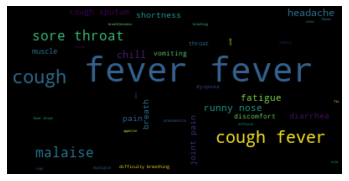

In [19]:
# fast show wordcloud
wordcloud = WordCloud().generate(all_symptoms)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Not perfect but at least we get a word cloud. 

We realize some problems exising with above code:

- Some words are too small to be seen
- Why are there two fevers?
- The font is so blurry, can we make it much clearer?

Let us move on to manage them. 
The wordCould class has some default parameters, such as ```min_font_size``` to control the minimum word font size, and the pixel size is adjusted by width and height. 

The default value of  ```collocations``` is True, which is used to combine texts with equal importance/frequency. 

By adjusting these parameters, we can easily improve our word cloud picture.

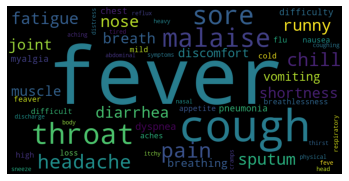

In [20]:
# change the resolution and cancel the collocations
wordcloud = WordCloud(
    min_font_size=10,
    width=800,
    height=400,
    collocations=False).generate(all_symptoms)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


A classic version of the wordcloud is polished, and it looks very good. 
We also get the answer to our first question: ***fever and cough are the most common symptoms***.

## Fancy WordCloud

Here is a picture of the human body, and we can also tag all these symptoms to describe the portraits of human body. 
To do this, we need to use the mask parameter of wordcloud. 

As its name shows, mask is used to mask some pixels.

Load the image and convert it to an array as a mask. We can see mask array constist lots of ```255 255 255``` which is very good as these means white color. 


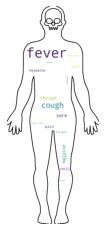

In [21]:
# modern wordcloud
mask = np.array(Image.open('../data/human_body_shape.png'))
wordcloud = WordCloud(
    background_color="white",
    min_font_size=10,
    width=1600,
    height=800,
    mask=mask,
    collocations=False,
    contour_width=2,
    contour_color='black').generate(all_symptoms)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

The plot looks a little better than the classic one, but there are still some flaws. 

We can see a lot of blank spaces in the outline of the body, this is because the number of  symptoms is relatively small and cannot fill up the image.


## Colorful WordCloud
Obviously, the amount of information in the ```summary``` column is much larger than that of the ```symbol```.
This time we choose a color image (robot) and run the code again without any changes.

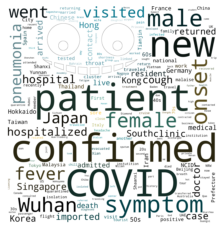

In [22]:
mask = np.array(Image.open('../data/robot.png'))
all_summary = line_list_data_raw_df['summary'].str.cat(sep=',')
image_colors = ImageColorGenerator(mask)
wordcloud = WordCloud(
    background_color="white",
    min_font_size=10,
    width=800,
    height=400,
    mask=mask,
    collocations=False,
    contour_width=1,
    contour_color='black').generate(all_summary)
plt.figure()
plt.imshow(
    wordcloud.recolor(
        color_func=image_colors),
    interpolation="bilinear")
plt.axis("off")
plt.show()
# refer to https://www.datacamp.com/community/tutorials/wordcloud-python

Oops, where is my lovely robot? Why are there only two eyes and a few front teeth?

There must be something wrong with the mask.

Let's print the created mask matrix. It is full of ***zeros***. The datacamp blog gives a explaination [https://www.datacamp.com/community/tutorials/wordcloud-python]:

```The way the masking functions works is that it requires all white part of the mask should be 255 not 0 (integer type). This value represents the "intensity" of the pixel. Values of 255 are pure white, whereas values of 1 are black. Here, you can use the provided function below to transform your mask if your mask has the same format as above. Notice if you have a mask that the background is not 0, but 1 or 2, adjust the function to match your mask.```

In [23]:
mask

array([[[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       ...,

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]]], dtype=uint8)

The solution is quite straightforward by replacing 0 with 255, and then remake the wordcloud.

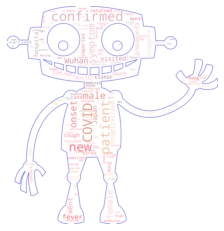

In [24]:
mask[mask == 0] = 255
image_colors = ImageColorGenerator(mask)
wordcloud = WordCloud(
    background_color="white",
    min_font_size=10,
    width=800,
    height=400,
    mask=mask,
    collocations=False,
    contour_width=2,
    contour_color='blue').generate(all_summary)
plt.figure()
plt.imshow(
    wordcloud.recolor(
        color_func=image_colors),
    interpolation="bilinear")
plt.axis("off")
plt.show()

The cute robot finally appears.

Returning to the question we mentioned at the beginning, we can see that the summary is mainly about new confirmed cases of COVID, and the patient may be related to Wuhan. 
And it seems that more males than females are recorded.


So far, our two questions have been answered through the wordcloud analysis.

## To Recap

This post introduces how to generate wordcloud in classic way and fancy version. By using wordcloud, we can get the key information of massive text content at a glance. 

We also buried some of the pits in the word cloud production process:

- screen resolution problem
- reduplication problem
- The maksing problem of color pictures